In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Dense,Conv2D,MaxPooling2D,Dropout,Activation
from tensorflow.keras import backend as bk
from tqdm import tqdm
import cv2
from tensorflow.keras.optimizers import SGD,Adam,RMSprop,Adagrad,Adamax
from tensorflow.keras.models import Sequential
import pandas as pd
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import classification_report

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from PIL import Image

In [3]:
class_name=["cats","dogs"]
label_name={class_name: i for i, class_name in enumerate(class_name)}

In [4]:
print(len(label_name))

2


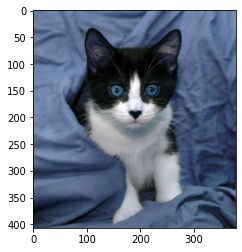

In [5]:
image_path=cv2.imread("../input/cat-and-dogs/dataset/training_set/cats/cat.1002.jpg")
plt.imshow(image_path)
plt.show()



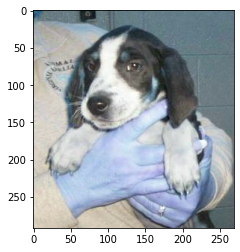

In [6]:
image_path=cv2.imread("../input/cat-and-dogs/dataset/training_set/dogs/dog.10.jpg")
plt.imshow(image_path)
plt.show()

In [7]:
image_shape=(128,128)


Dataset Load and Labeling

In [8]:
def data_set_load():
    
    data_path=["../input/cat-and-dogs/dataset/training_set/","../input/cat-and-dogs/dataset/test_set/"]

    image_data_output=[]
    for i in data_path:
        image_data=[]
        label_data=[]
        print("Counting:{}".format(i))
        
        for j in os.listdir(i):
            label=label_name[j]
            for image_data_file in tqdm(os.listdir(os.path.join(i,j))):
                image_path=os.path.join(os.path.join(i,j),image_data_file)
                image=cv2.imread(image_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,image_shape)
                image_data.append(image)
                label_data.append(label)
                
        image_data=np.array(image_data,dtype="float32")
        label_data=np.array(label_data,dtype="float32")
        image_data_output.append((image_data,label_data))
        
    return image_data_output

In [9]:
data_set_load()

Counting:../input/cat-and-dogs/dataset/training_set/


100%|██████████| 4000/4000 [00:17<00:00, 228.62it/s]


Counting:../input/cat-and-dogs/dataset/test_set/


100%|██████████| 1000/1000 [00:04<00:00, 249.50it/s]


[(array([[[[237., 230., 222.],
           [237., 230., 222.],
           [237., 230., 222.],
           ...,
           [225., 221., 210.],
           [223., 219., 208.],
           [223., 219., 208.]],
  
          [[238., 231., 223.],
           [238., 231., 223.],
           [238., 231., 223.],
           ...,
           [229., 225., 214.],
           [229., 226., 214.],
           [225., 221., 210.]],
  
          [[239., 232., 224.],
           [239., 232., 224.],
           [239., 232., 224.],
           ...,
           [233., 229., 218.],
           [234., 230., 219.],
           [228., 225., 213.]],
  
          ...,
  
          [[192., 183., 166.],
           [185., 176., 159.],
           [188., 179., 162.],
           ...,
           [186., 181., 159.],
           [185., 180., 158.],
           [186., 181., 159.]],
  
          [[191., 182., 165.],
           [184., 175., 158.],
           [187., 178., 161.],
           ...,
           [183., 179., 155.],
           [183., 

In [10]:
# (train_image,train_label),(test_image,test_label)=shuffle(data_set_load())

In [11]:
(X_train,Y_train),(X_test,Y_test)=data_set_load()

Counting:../input/cat-and-dogs/dataset/training_set/


100%|██████████| 4000/4000 [00:13<00:00, 301.30it/s]


Counting:../input/cat-and-dogs/dataset/test_set/


100%|██████████| 1000/1000 [00:03<00:00, 286.17it/s]


In [12]:
X_train,Y_train=shuffle(X_train,Y_train,random_state=42)

In [13]:
_,train_image_label_info=np.unique(Y_train,return_counts=True)
_,test_image_label_info=np.unique(Y_test,return_counts=True)

In [14]:
print("Train image label information for 0 class  :",train_image_label_info[0])
print("Train image label information for 1 class  :",train_image_label_info[1])

Train image label information for 0 class  : 4000
Train image label information for 1 class  : 4000


In [15]:
print("Test image label information for 0 class  :",test_image_label_info[0])
print("Test image label information for 1 class  :",test_image_label_info[1])

Test image label information for 0 class  : 1000
Test image label information for 1 class  : 1000


Create DataFrame For Image Label

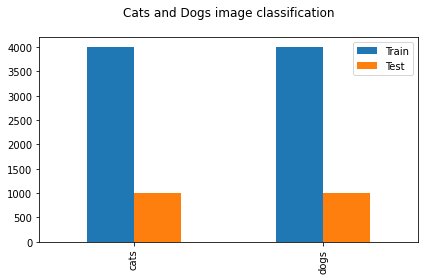

In [16]:
pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name).plot.bar()
plt.title("Cats and Dogs image classification\n")
plt.grid(False)
plt.tight_layout()
plt.show()

In [17]:
x=pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name)


In [18]:
pd.DataFrame({"Train":train_image_label_info,"Test":test_image_label_info},index=class_name)


,Train,Test
cats,4000,1000
dogs,4000,1000


In [19]:
y=(x["Train"][0],x["Train"][1],x["Test"][0],x["Test"][1])
myexplode = [0.2, 0,0.2,0.3]

In [20]:
my_label=["Cat image_Train ","Dog image_Train","Cat image_Test","Dog image_Test"]
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
# color = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

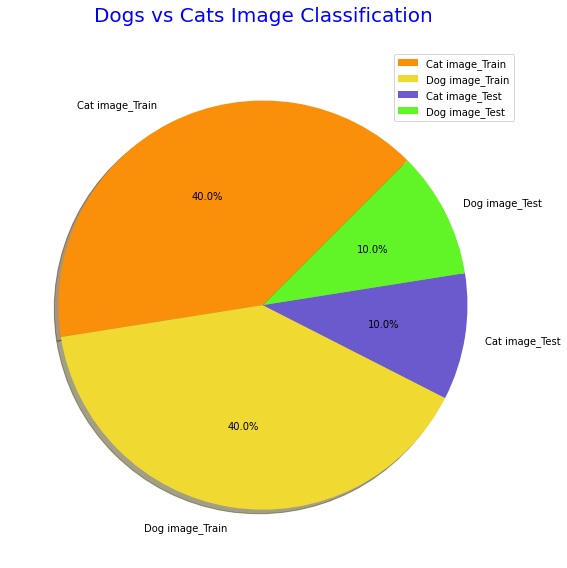

In [21]:
plt.figure(figsize=(8,8))
plt.pie(y, labels =my_label, shadow = True,colors=color,autopct='%1.1f%%',startangle=45,counterclock=True)
plt.title("Dogs vs Cats Image Classification\n",color="Blue",fontsize=20)
plt.tight_layout()
plt.legend(loc="best")
plt.show() 

In [22]:
len(np.unique(X_train[0]))

256

In [23]:
len(np.unique(X_test[0]))

256

In [24]:
train_image=X_train/255.0


In [25]:
test_image=X_test/255.0

In [26]:
len(np.unique(train_image[0]))

256

In [27]:
len(np.unique(test_image[0]))

256

Visualize Random Cats  & Dogs Images

In [28]:
def RandomImage_visualization(class_names,imagedata_path,imagedata_label):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle("Cats and Dogs Images Visualization\n",color="blue",fontsize=20)
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.imshow(imagedata_path[i],cmap=plt.cm.BrBG)
        plt.xlabel("Class Names: {}".format(class_names[int(imagedata_label[i])]))
    plt.show()
        

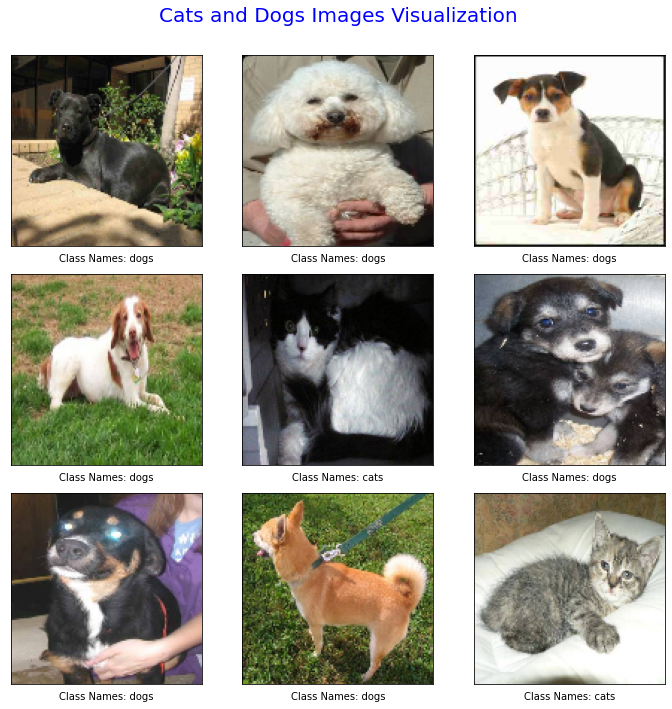

In [29]:
RandomImage_visualization(class_name,train_image,Y_train)

Create Custom CNN Model

In [30]:
model = Sequential([
    
    # Input Layer
    
    Conv2D(32, (3, 3), activation = "relu", input_shape = (128, 128, 3)),
    MaxPooling2D(2, 2),
    
    #1st Hidden Layer

    Conv2D(64, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
     #2nd Hidden Layer
    
    Conv2D(128, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    #3rd Hidden Layer
    
    Conv2D(256, (3, 3), activation = "relu"),
    MaxPooling2D(2, 2),
    
    Flatten(),
    
    # Connected Layer
    
    Dense(256, activation = "relu"),
    Dense(2, activation = "softmax")
])
model.summary()

2022-11-08 14:53:07.122852: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:53:07.150776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:53:07.151583: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       2

2022-11-08 14:53:07.153272: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-08 14:53:07.153595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:53:07.154273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 14:53:07.154937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [31]:
model.compile(optimizer = 'adam',loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])
         


In [32]:
history=model.fit(train_image,Y_train,validation_data=(test_image,Y_test),batch_size=42,epochs=20)

2022-11-08 14:53:08.038384: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1572864000 exceeds 10% of free system memory.
2022-11-08 14:53:09.785545: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1572864000 exceeds 10% of free system memory.
2022-11-08 14:53:11.066646: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-11-08 14:53:11.870449: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


191/191 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.5346

2022-11-08 14:53:16.064889: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 393216000 exceeds 10% of free system memory.
2022-11-08 14:53:16.596698: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 393216000 exceeds 10% of free system memory.


191/191 [==============================] - 6s 24ms/step - loss: 0.6970 - accuracy: 0.5346 - val_loss: 0.6692 - val_accuracy: 0.5985
Epoch 2/20
191/191 [==============================] - 3s 17ms/step - loss: 0.6527 - accuracy: 0.6034 - val_loss: 0.6075 - val_accuracy: 0.6490
Epoch 3/20
191/191 [==============================] - 3s 17ms/step - loss: 0.5891 - accuracy: 0.6787 - val_loss: 0.5631 - val_accuracy: 0.7045
Epoch 4/20
191/191 [==============================] - 3s 17ms/step - loss: 0.5363 - accuracy: 0.7341 - val_loss: 0.5193 - val_accuracy: 0.7365
Epoch 5/20
191/191 [==============================] - 3s 16ms/step - loss: 0.4817 - accuracy: 0.7699 - val_loss: 0.4747 - val_accuracy: 0.7720
Epoch 6/20
191/191 [==============================] - 3s 16ms/step - loss: 0.4240 - accuracy: 0.7984 - val_loss: 0.4524 - val_accuracy: 0.7950
Epoch 7/20
191/191 [==============================] - 3s 17ms/step - loss: 0.3689 - accuracy: 0.8326 - val_loss: 0.4205 - val_accuracy: 0.8145
Epoch 8/20

Model Training Loss and Accuracy Graph

In [33]:
def model_loss_and_accuracy(history):
    
    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],"bo--",label="accuracy")
    plt.plot(history.history["val_accuracy"],"ro--",label="val_accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend(loc="upper left")
    plt.tight_layout()
    
  
    plt.subplot(222)
    plt.plot(history.history["loss"],"bo--",label="loss")
    plt.plot(history.history["val_loss"],"ro--",label="val_loss")
    plt.title("Model Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()

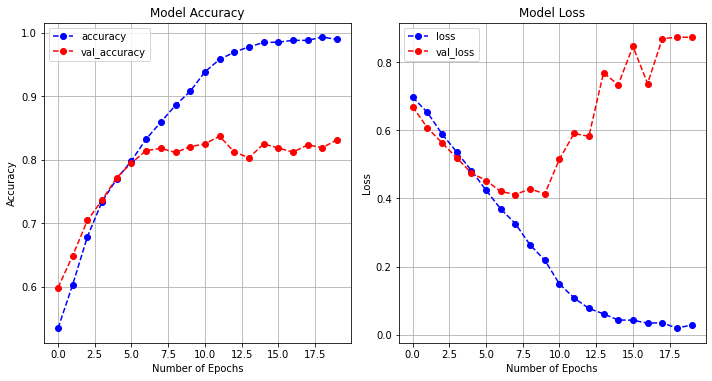

In [34]:
 model_loss_and_accuracy(history)

In [35]:
model.evaluate(test_image,Y_test)

2022-11-08 14:54:33.852642: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 393216000 exceeds 10% of free system memory.


63/63 [==============================] - 1s 7ms/step - loss: 0.8726 - accuracy: 0.8315


[0.8725873827934265, 0.8314999938011169]

Confusion Matrix

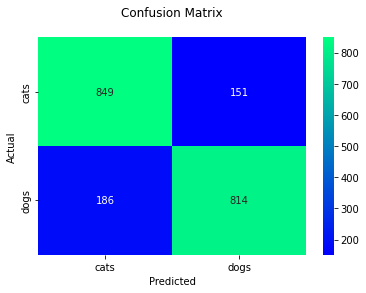

In [36]:
prediction=model.predict(test_image)
prediction_label=np.argmax(prediction,axis=1)
cm = confusion_matrix(Y_test,prediction_label)
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="winter",xticklabels=class_name,yticklabels=class_name)
plt.title("Confusion Matrix\n")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

Classification Report

In [37]:
print(classification_report(Y_test,prediction_label,target_names=["Cats","Dogs"]))

              precision    recall  f1-score   support

        Cats       0.82      0.85      0.83      1000
        Dogs       0.84      0.81      0.83      1000

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



Incorrect Model Prediction

In [38]:
def incorrect_Image_visualization(class_names,imagedata_path,imagedata_label):
    fig=plt.figure(figsize=(10,10))
    fig.suptitle("Incorrect  Images Visualization\n",color="blue",fontsize=20)
    
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.imshow(imagedata_path[i],cmap=plt.cm.BrBG)
        plt.xlabel("Class Names: {}".format(class_names[int(imagedata_label[i])]))
    plt.show()

In [39]:
def model_prediction(class_name,imagedata,imagelabel,predict_label):
    result=(imagelabel==predict_label)
    incorrect_result=np.where(result==0)
    incorrect_result=np.asarray(incorrect_result)
    incorrect_result=incorrect_result.flatten()
    
    false_image=[]
    false_label=[]
    
    for b in incorrect_result:
        false_image.append(imagedata[b])
        false_label.append(predict_label[b])
    print("Incorrect Model Prediction:\n")
    incorrect_Image_visualization(class_name,false_image,false_label)
    
    
        

Incorrect Model Prediction:



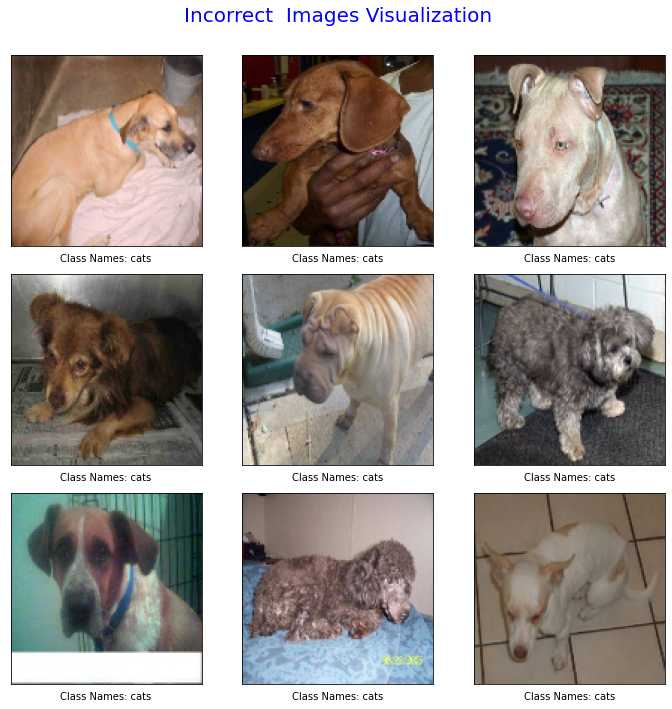

In [40]:
model_prediction(class_name,test_image,Y_test,prediction_label)

Custom Data Prediction

cat


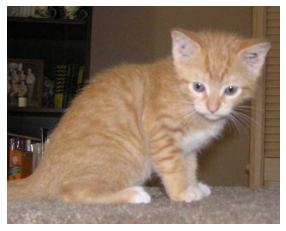

In [41]:
results={0:'cat',    1:'dog'}

test_image_path=Image.open("../input/cat-and-dogs/dataset/test_set/cats/cat.4003.jpg")
imge=test_image_path.resize(image_shape)
imge=np.expand_dims(imge,axis=0)
imge=np.array(imge)/255
final_predct=np.argmax(model.predict([imge])[0])


        
print(results[final_predct])
plt.imshow(test_image_path)
plt.axis("off")
plt.show()